In [ ]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('Indian_Domestic_Airline.csv', encoding='utf-8')

# Display the first few rows and basic information about the dataset
print(df.head())
print("\
Dataset Info:")
print(df.info())

    AirLine_Name  Rating - 10                          Title  \
0  AirAsia India          6.0          "crew were welcoming"   
1  AirAsia India          1.0     "furious and disappointed"   
2  AirAsia India         10.0  "amazing service and support"   
3  AirAsia India          1.0      "Waste of time and money"   
4  AirAsia India          8.0   "thumbs up to boarding crew"   

                     Name               Date  \
0                V Bakshi  14th October 2023   
1                 G Oscar  14th October 2023   
2             Rahul Verma  14th October 2023   
3                 G Akron  14th October 2023   
4  Sirajudeen Jawahar ali  14th October 2023   

                                              Review Recommond  
0  ✅ Trip Verified | I had booked this fare at a ...       yes  
1  ✅ Trip Verified | I travel at least four times...        no  
2  ✅ Trip Verified | Taking this opportunity to a...       yes  
3  ✅ Trip Verified | The worst airlines in the hi...        no  
4

In [ ]:
# Install required libraries
%pip install nltk textblob

import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('vader_lexicon')

# Load the dataset
df = pd.read_csv('Indian_Domestic_Airline.csv', encoding='utf-8')

# Initialize NLTK's SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

# Apply sentiment analysis to the 'Review' column
df['sentiment_scores'] = df['Review'].apply(get_sentiment_scores)

# Extract compound sentiment score
df['sentiment_compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Categorize sentiment
df['sentiment_category'] = df['sentiment_compound'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Display the first few rows with sentiment analysis results
print(df[['AirLine_Name', 'Rating - 10', 'Review', 'sentiment_compound', 'sentiment_category']].head())

# Calculate average sentiment by airline
avg_sentiment = df.groupby('AirLine_Name')['sentiment_compound'].mean().sort_values(ascending=False)

# Plot average sentiment by airline
plt.figure(figsize=(12, 6))
avg_sentiment.plot(kind='bar')
plt.title('Average Sentiment by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('airline_sentiment.png')
plt.close()

# Calculate sentiment distribution
sentiment_distribution = df['sentiment_category'].value_counts(normalize=True) * 100

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.savefig('sentiment_distribution.png')
plt.close()

print("\
Average Sentiment by Airline:")
print(avg_sentiment)

print("\
Sentiment Distribution:")
print(sentiment_distribution)

print("\
Sentiment analysis completed. Plots saved as 'airline_sentiment.png' and 'sentiment_distribution.png'.")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


    AirLine_Name  Rating - 10  \
0  AirAsia India          6.0   
1  AirAsia India          1.0   
2  AirAsia India         10.0   
3  AirAsia India          1.0   
4  AirAsia India          8.0   

                                              Review  sentiment_compound  \
0  ✅ Trip Verified | I had booked this fare at a ...              0.7577   
1  ✅ Trip Verified | I travel at least four times...             -0.9883   
2  ✅ Trip Verified | Taking this opportunity to a...              0.9932   
3  ✅ Trip Verified | The worst airlines in the hi...             -0.9186   
4  ✅ Trip Verified |  Would like to give big thum...              0.3612   

  sentiment_category  
0           Positive  
1           Negative  
2           Positive  
3           Negative  
4           Positive  
Average Sentiment by Airline:
AirLine_Name
Vistara              0.482264
IndiGo               0.222067
AirAsia India        0.037108
SpiceJet            -0.125725
Air India Express   -0.233326
AirIndia     

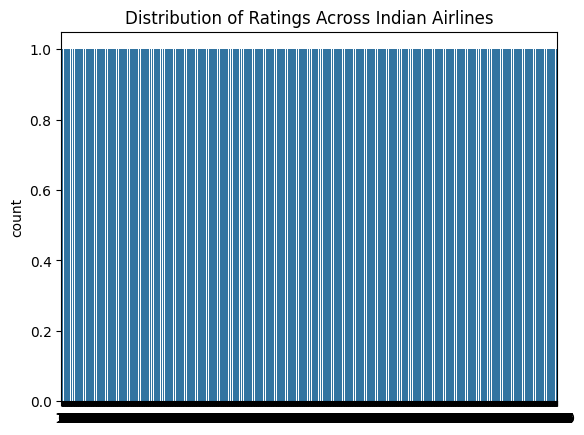

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/Dataseet of Indian_Domestic_Airline.csv')

# Rating distribution
sns.countplot(df['Rating - 10'])
plt.title('Distribution of Ratings Across Indian Airlines')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
!pip install scikit-learn pandas nltk textblob

import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Check for non-numeric values in the 'Rating - 10' column
non_numeric_ratings = df[pd.to_numeric(df['Rating - 10'], errors='coerce').isna()]

# Display the non-numeric entries
print("Non-numeric entries in 'Rating - 10':")
print(non_numeric_ratings)

# Display the first few rows of the dataset to understand its structure
print("\
Sample data:")
print(df.head())

Non-numeric entries in 'Rating - 10':
     AirLine_Name  Rating - 10                   Title              Name  \
1376       IndiGo          NaN  IndiGo customer review    Pinaki Bhadury   
1404       IndiGo          NaN  IndiGo customer review   Devayani Hirani   
1429       IndiGo          NaN  IndiGo customer review   Bansal Shailesh   
1441       IndiGo          NaN  IndiGo customer review  Kapil Khandelwal   

                    Date                                             Review  \
1376  3rd September 2015  6E189 6th June. Low budget Airline - their far...   
1404      22nd July 2014  Kept waiting for more then one hour in the pla...   
1429    7th October 2013  26 May 2013 Jaipur to Chennai. I saw some dirt...   
1441    8th January 2013  I travelled from Bangalore to Jaipur. The leg ...   

     Recommond                                   sentiment_scores  \
1376        no  {'neg': 0.073, 'neu': 0.866, 'pos': 0.061, 'co...   
1404        no  {'neg': 0.066, 'neu': 0.906, 'p

<ipython-input-12-bed9f6620c91>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AirLine_Name', y='Rating - 10', data=df, palette="Set2")
<ipython-input-12-bed9f6620c91>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='AirLine_Name', y='Rating - 10', data=df, palette="Set2")


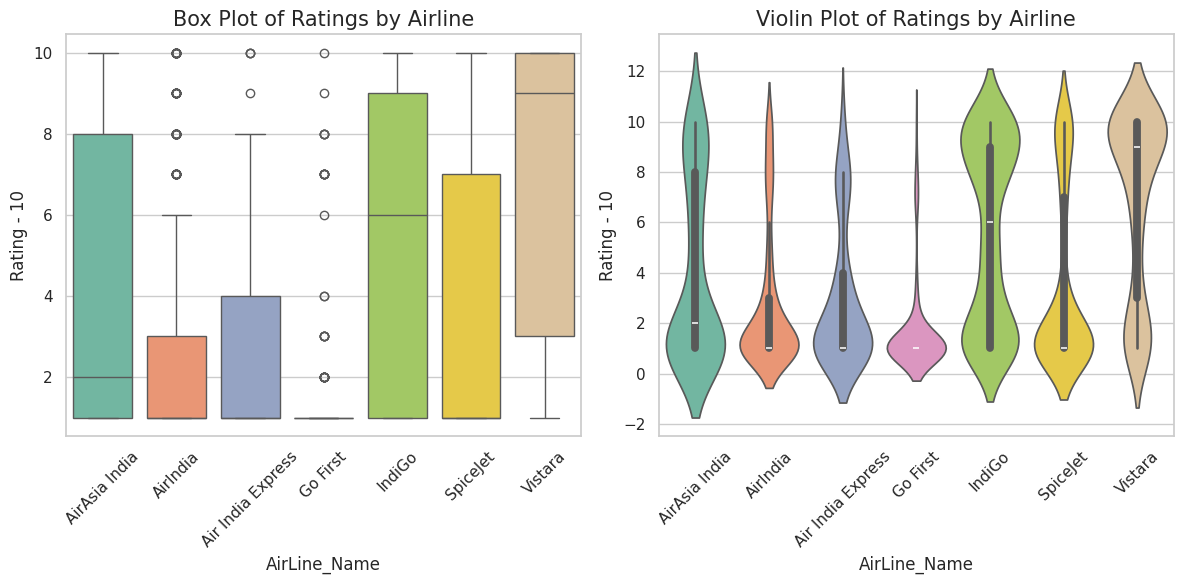

In [12]:

# Optional: Ensure that the 'rating' column is numeric (in case it was loaded as a string)
df['Rating - 10'] = pd.to_numeric(df['Rating - 10'], errors='coerce')

# Remove any rows with missing or NaN values in 'rating' or 'airline'
df = df.dropna(subset=['Rating - 10', 'AirLine_Name'])

# Set the plot style
sns.set(style="whitegrid")

# Set the figure size for the plots
plt.figure(figsize=(12, 6))

# ---------------- Box Plot ----------------
plt.subplot(1, 2, 1)  # Create subplots
sns.boxplot(x='AirLine_Name', y='Rating - 10', data=df, palette="Set2")
plt.title('Box Plot of Ratings by Airline', fontsize=15)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# ---------------- Violin Plot ----------------
plt.subplot(1, 2, 2)
sns.violinplot(x='AirLine_Name', y='Rating - 10', data=df, palette="Set2")
plt.title('Violin Plot of Ratings by Airline', fontsize=15)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
# Remove non-numeric entries from the 'Rating - 10' column
df_cleaned = df[pd.to_numeric(df['Rating - 10'], errors='coerce').notna()]

# Convert 'Rating - 10' to numeric
df_cleaned['Rating - 10'] = pd.to_numeric(df_cleaned['Rating - 10'])

# Verify the cleaning process
print("Cleaned data sample:")
print(df_cleaned.head())

Cleaned data sample:
    AirLine_Name  Rating - 10                          Title  \
0  AirAsia India          6.0          "crew were welcoming"   
1  AirAsia India          1.0     "furious and disappointed"   
2  AirAsia India         10.0  "amazing service and support"   
3  AirAsia India          1.0      "Waste of time and money"   
4  AirAsia India          8.0   "thumbs up to boarding crew"   

                     Name               Date  \
0                V Bakshi  14th October 2023   
1                 G Oscar  14th October 2023   
2             Rahul Verma  14th October 2023   
3                 G Akron  14th October 2023   
4  Sirajudeen Jawahar ali  14th October 2023   

                                              Review Recommond  \
0  ✅ Trip Verified | I had booked this fare at a ...       yes   
1  ✅ Trip Verified | I travel at least four times...        no   
2  ✅ Trip Verified | Taking this opportunity to a...       yes   
3  ✅ Trip Verified | The worst airlines i

<ipython-input-20-cd489442dfce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Rating - 10'] = pd.to_numeric(df_cleaned['Rating - 10'])


In [ ]:
def improved_predict_rating_with_sentiment(airline_name, review_text):
    # Filter data for the specified airline
    airline_data = df_cleaned[df_cleaned['AirLine_Name'] == airline_name]

    if airline_data.empty:
        return f"No data found for {airline_name}"

    # Prepare data for prediction model
    X = airline_data['Review']
    y = airline_data['Rating - 10']

    # Use TF-IDF Vectorizer for text data
    vectorizer = TfidfVectorizer(max_features=100)
    X_tfidf = vectorizer.fit_transform(X)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

    # Train the model using RandomForestRegressor
    model = make_pipeline(StandardScaler(with_mean=False), RandomForestRegressor(n_estimators=100, random_state=42))
    model.fit(X_train, y_train)

    # Make prediction for the user input
    user_review_tfidf = vectorizer.transform([review_text])
    predicted_rating = model.predict(user_review_tfidf)[0]

    # Determine sentiment
    if predicted_rating > 6.5:
        sentiment = "Positive"
    elif predicted_rating < 4.5:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return f"""
Predicted Rating for {airline_name}: {predicted_rating:.2f} ({sentiment})
Model Performance:
- Mean Squared Error: {mse:.4f}
- R-squared: {r2:.4f}
    """

# Example usage
example_airline = 'IndiGo'
example_review ="huge crowds at the check in counters"
improved_result_with_sentiment = improved_predict_rating_with_sentiment(example_airline, example_review)
print(improved_result_with_sentiment)


Predicted Rating for IndiGo: 5.63 (Neutral)
Model Performance:
- Mean Squared Error: 7.4758
- R-squared: 0.4161
    


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


    AirLine_Name  Rating - 10                          Title  \
0  AirAsia India          6.0          "crew were welcoming"   
1  AirAsia India          1.0     "furious and disappointed"   
2  AirAsia India         10.0  "amazing service and support"   
3  AirAsia India          1.0      "Waste of time and money"   
4  AirAsia India          8.0   "thumbs up to boarding crew"   

                     Name               Date  \
0                V Bakshi  14th October 2023   
1                 G Oscar  14th October 2023   
2             Rahul Verma  14th October 2023   
3                 G Akron  14th October 2023   
4  Sirajudeen Jawahar ali  14th October 2023   

                                              Review Recommond  
0  ✅ Trip Verified | I had booked this fare at a ...       yes  
1  ✅ Trip Verified | I travel at least four times...        no  
2  ✅ Trip Verified | Taking this opportunity to a...       yes  
3  ✅ Trip Verified | The worst airlines in the hi...        no  
4

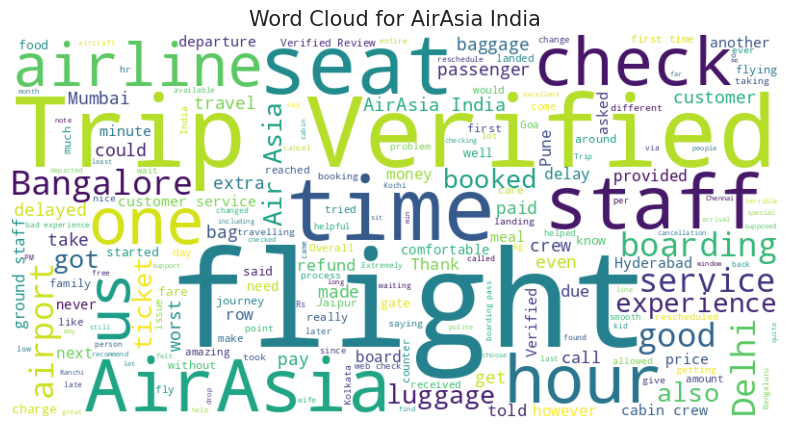

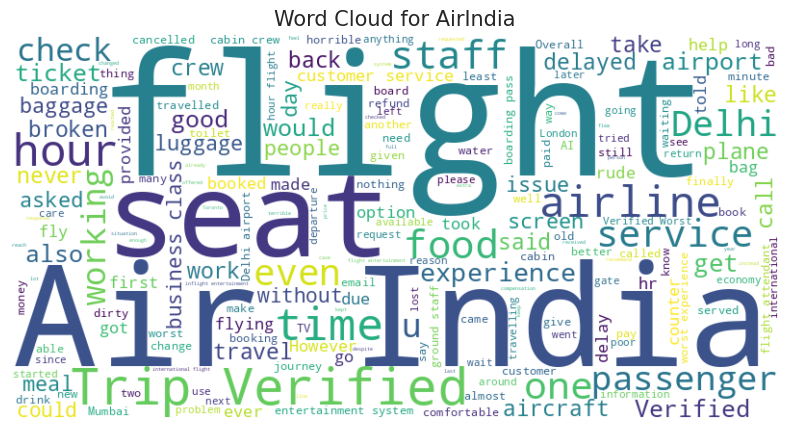

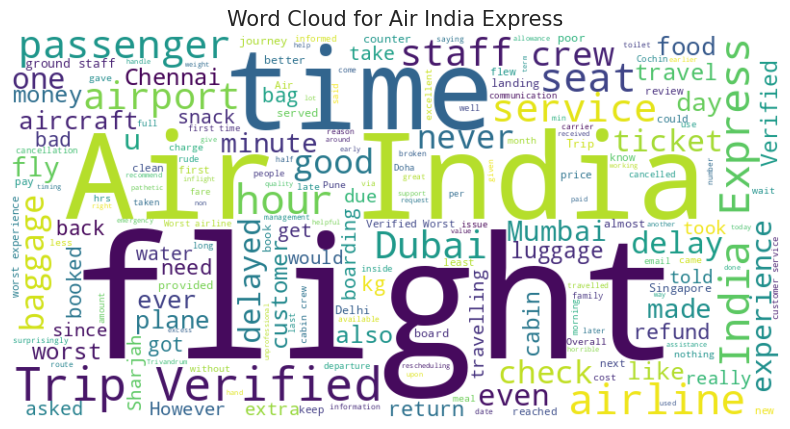

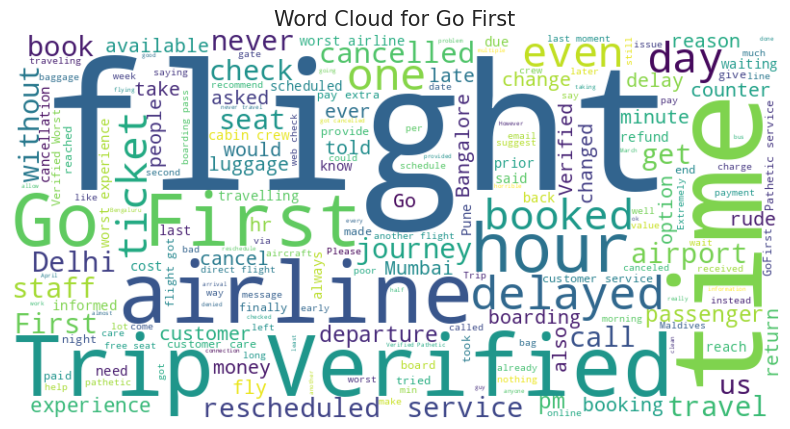

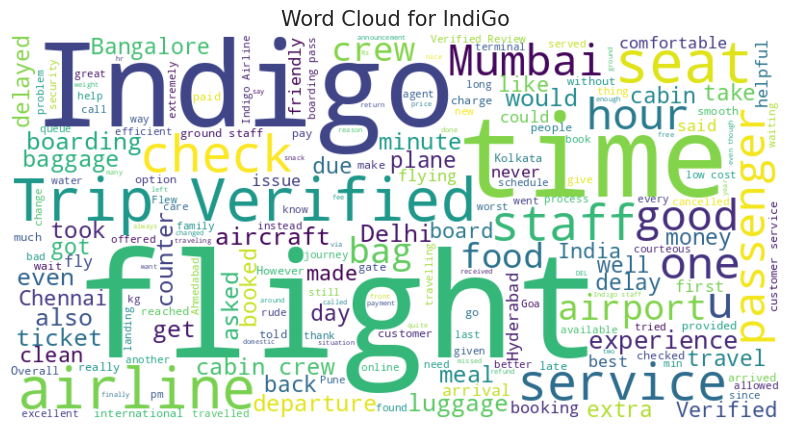

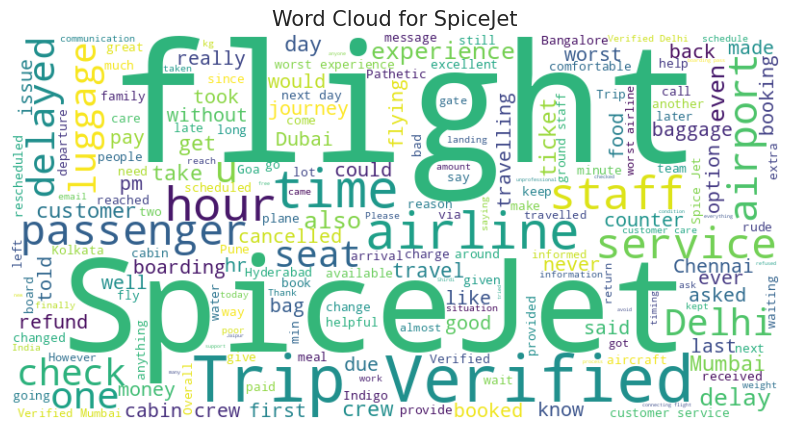

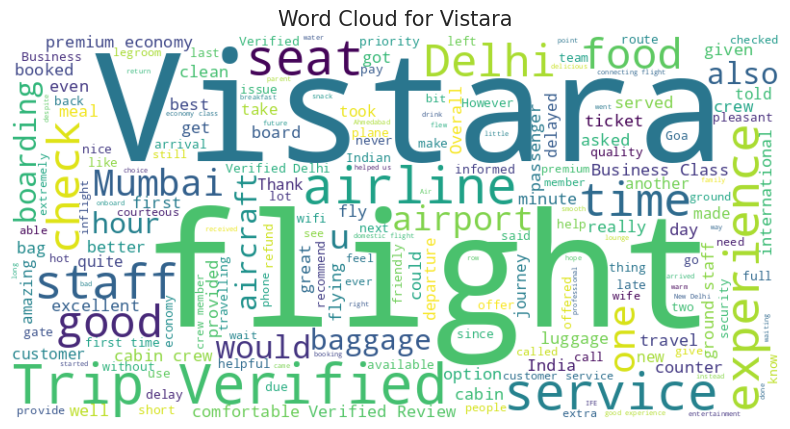

In [28]:
# Import necessary libraries
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords
nltk.download('stopwords')

# Load the dataset (replace 'your_dataset.csv' with your actual dataset path)
df = pd.read_csv('/content/Dataseet of Indian_Domestic_Airline.csv')

# Preview the dataset
print(df.head())

# Ensure 'airline' and 'review_text' columns exist and drop missing values
df = df.dropna(subset=['AirLine_Name', 'Review'])

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Function to create a word cloud for a specific airline
def create_word_cloud(airline_name):
    # Filter reviews for the specified airline
    airline_reviews = df[df['AirLine_Name'] == airline_name]

    # Combine all reviews into a single string
    all_reviews = ' '.join(review for review in airline_reviews['Review'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words, colormap='viridis').generate(all_reviews)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {airline_name}", fontsize=15)
    plt.show()

# Create word clouds for each airline (replace 'Air India', 'IndiGo', 'SpiceJet', etc., with your airlines)
for airline in df['AirLine_Name'].unique():
    create_word_cloud(airline)
